In [1]:
# !pip install ctgan

In [2]:
# !pip install table_evaluator

In [3]:

import pandas as pd
import io
from sklearn.preprocessing import LabelEncoder
 
data = pd.read_csv('dataset/tpmd_og.csv')
data = data.drop('date', axis=1)
data

,T,RH,LW,WS,GR,Class
0,32.3,47.0,24,3,51,Non-Conducive
1,31.6,45.0,23,2,49,Non-Conducive
2,30.4,43.0,21,4,46,Non-Conducive
3,31.7,46.0,24,3,50,Non-Conducive
4,32.5,50.0,27,1,53,Non-Conducive
...,...,...,...,...,...,...
239,18.5,60.0,31,4,28,Non-Conducive
240,19.6,61.0,30,3,26,Non-Conducive
241,20.4,64.0,27,2,25,Non-Conducive
242,21.1,67.0,29,1,27,Non-Conducive


In [4]:
categorical_features = ['T', 'RH', 'LW', 'WS','GR']
target = data[['Class']]
target.head()
le = LabelEncoder()
t = le.fit_transform(target)
print(t)
data['Class'] = t
print(data.head(25))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
       T    RH  LW  WS  GR  Class
0   32.3  47.0  24   3  51      1
1   31.6  45.0  23   2  49      1
2   30.4  43.0  21   4  46      1
3   31.7  46.0  24   3  50      1
4   32.5  50.0  27   1  53      1
5   33.2  54.0  29   2  56      1
6   31.6  49.0  26   4  54      1
7   30.2  47.0  25   3  51      1
8   30.8  48.0  24   4  53      1
9   29.5  45.0  22   5  50      1
10  28.7  46.0  23   3  47      1
11  29.3  50.0  25   2  49      1
12  28.1  48.0  24   3  48      1
13  27.6  45.0  22   4  46  

c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Epoch 1, Loss G:  3.5872,Loss D: -0.0043
Epoch 2, Loss G:  3.4754,Loss D: -0.0008
Epoch 3, Loss G:  3.5524,Loss D: -0.0076
Epoch 4, Loss G:  3.4238,Loss D: -0.0118
Epoch 5, Loss G:  3.4709,Loss D: -0.0157
Epoch 6, Loss G:  3.4572,Loss D: -0.0179
Epoch 7, Loss G:  3.5460,Loss D: -0.0293
Epoch 8, Loss G:  3.4278,Loss D: -0.0348
Epoch 9, Loss G:  3.4411,Loss D: -0.0342
Epoch 10, Loss G:  3.5036,Loss D: -0.0483
Epoch 11, Loss G:  3.3726,Loss D: -0.0318
Epoch 12, Loss G:  3.3670,Loss D: -0.0340
Epoch 13, Loss G:  3.4439,Loss D: -0.0376
Epoch 14, Loss G:  3.3875,Loss D: -0.0563
Epoch 15, Loss G:  3.4298,Loss D: -0.0451
Epoch 16, Loss G:  3.3370,Loss D: -0.0004
Epoch 17, Loss G:  3.3823,Loss D: -0.0597
Epoch 18, Loss G:  3.2971,Loss D: -0.0618
Epoch 19, Loss G:  3.2966,Loss D: -0.0806
Epoch 20, Loss G:  3.2928,Loss D: -0.0548
Epoch 21, Loss G:  3.3379,Loss D: -0.1049
Epoch 22, Loss G:  3.1494,Loss D: -0.0488
Epoch 23, Loss G:  3.3402,Loss D: -0.0630
Epoch 24, Loss G:  3.2764,Loss D: -0.0075
E

KeyboardInterrupt: 

In [ ]:
samples = ctgan.sample(1200)

In [ ]:
samples

,T,RH,LW,WS,GR,Class
0,26.3,81.0,35,3,37,1
1,27.8,67.0,32,5,36,1
2,29.5,65.0,24,1,56,1
3,30.2,58.0,26,1,40,1
4,22.6,85.0,13,3,37,0
...,...,...,...,...,...,...
1195,25.4,77.0,16,3,35,1
1196,29.3,75.0,27,2,36,1
1197,29.5,78.0,31,3,38,1
1198,23.5,81.0,36,2,37,1


Note: you may need to restart the kernel to use updated packages.
(244, 6) (1200, 6)


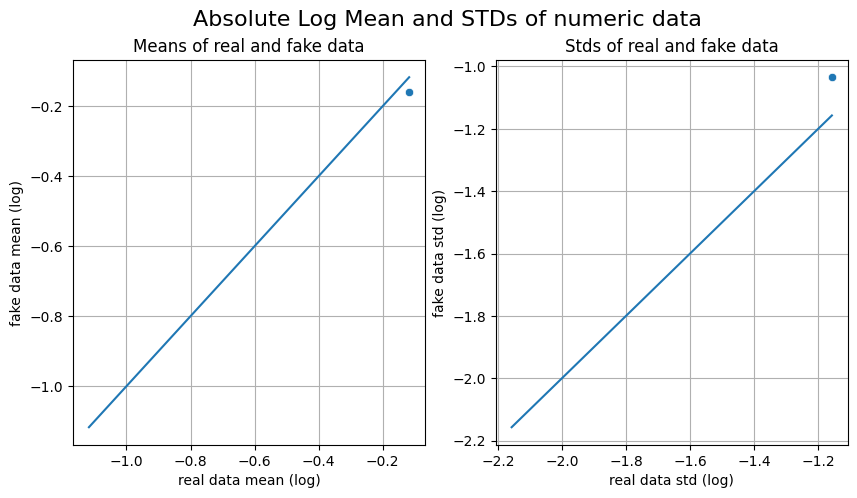

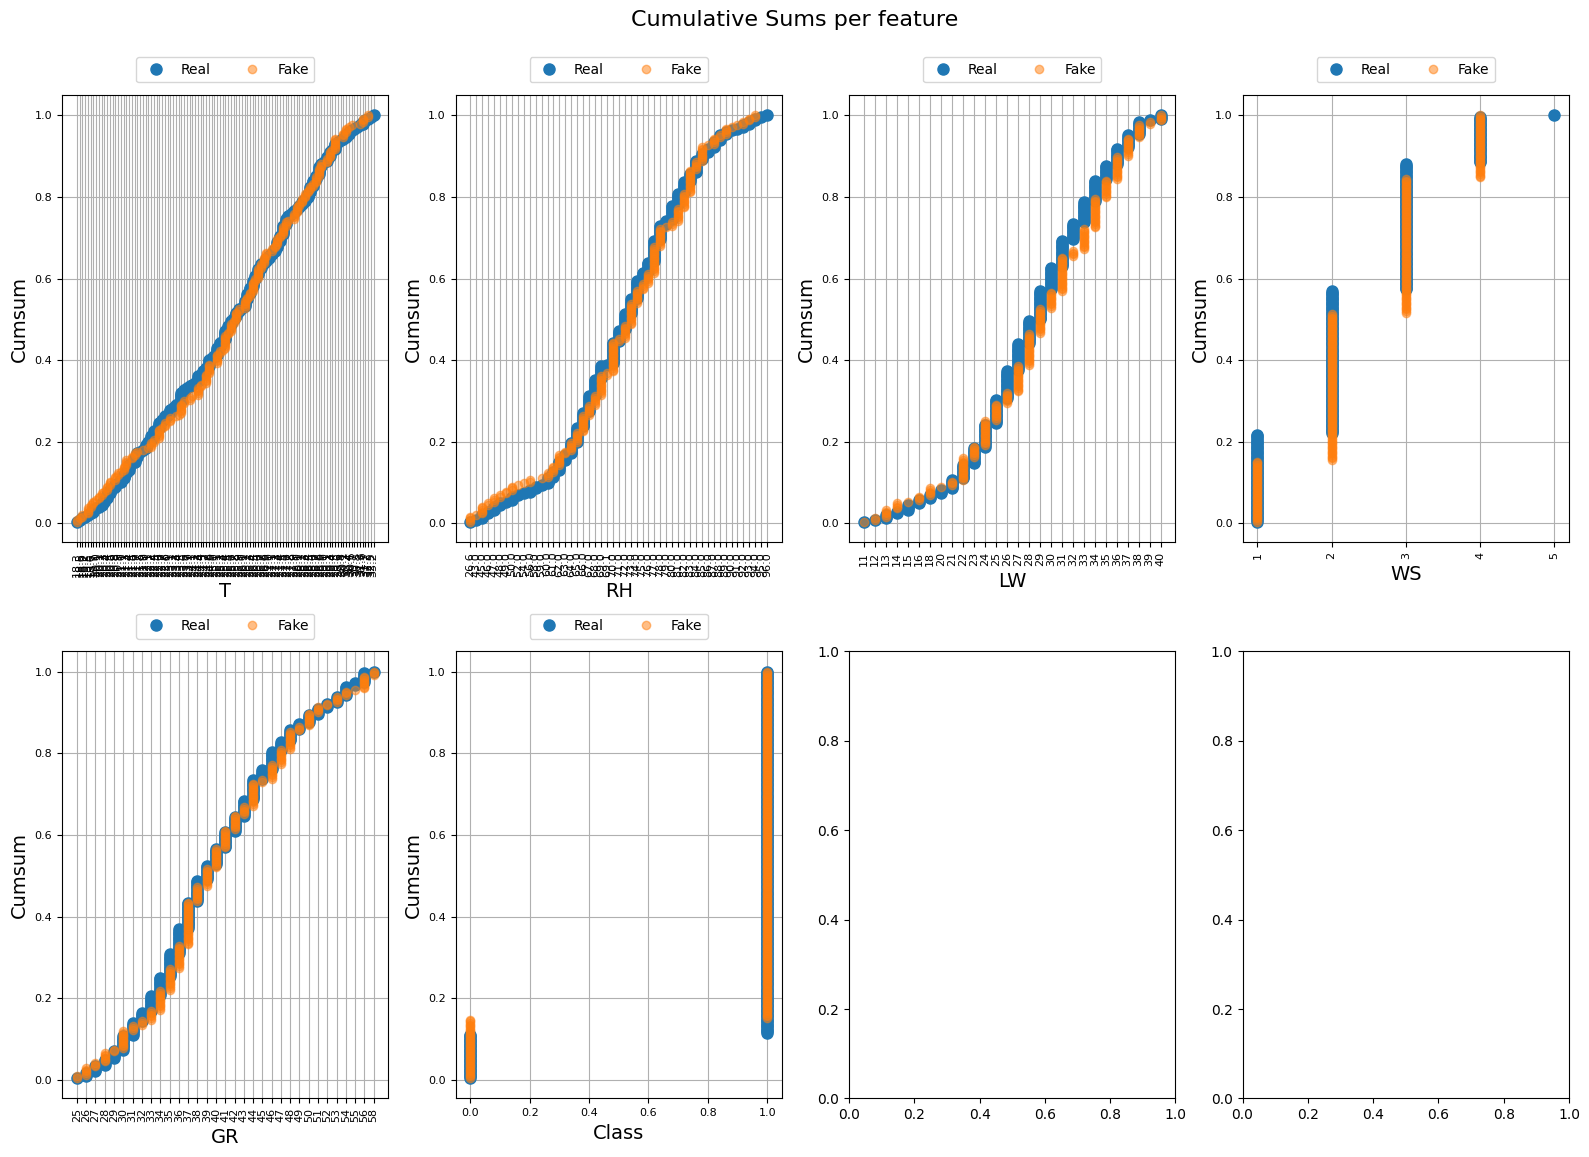

c:\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})


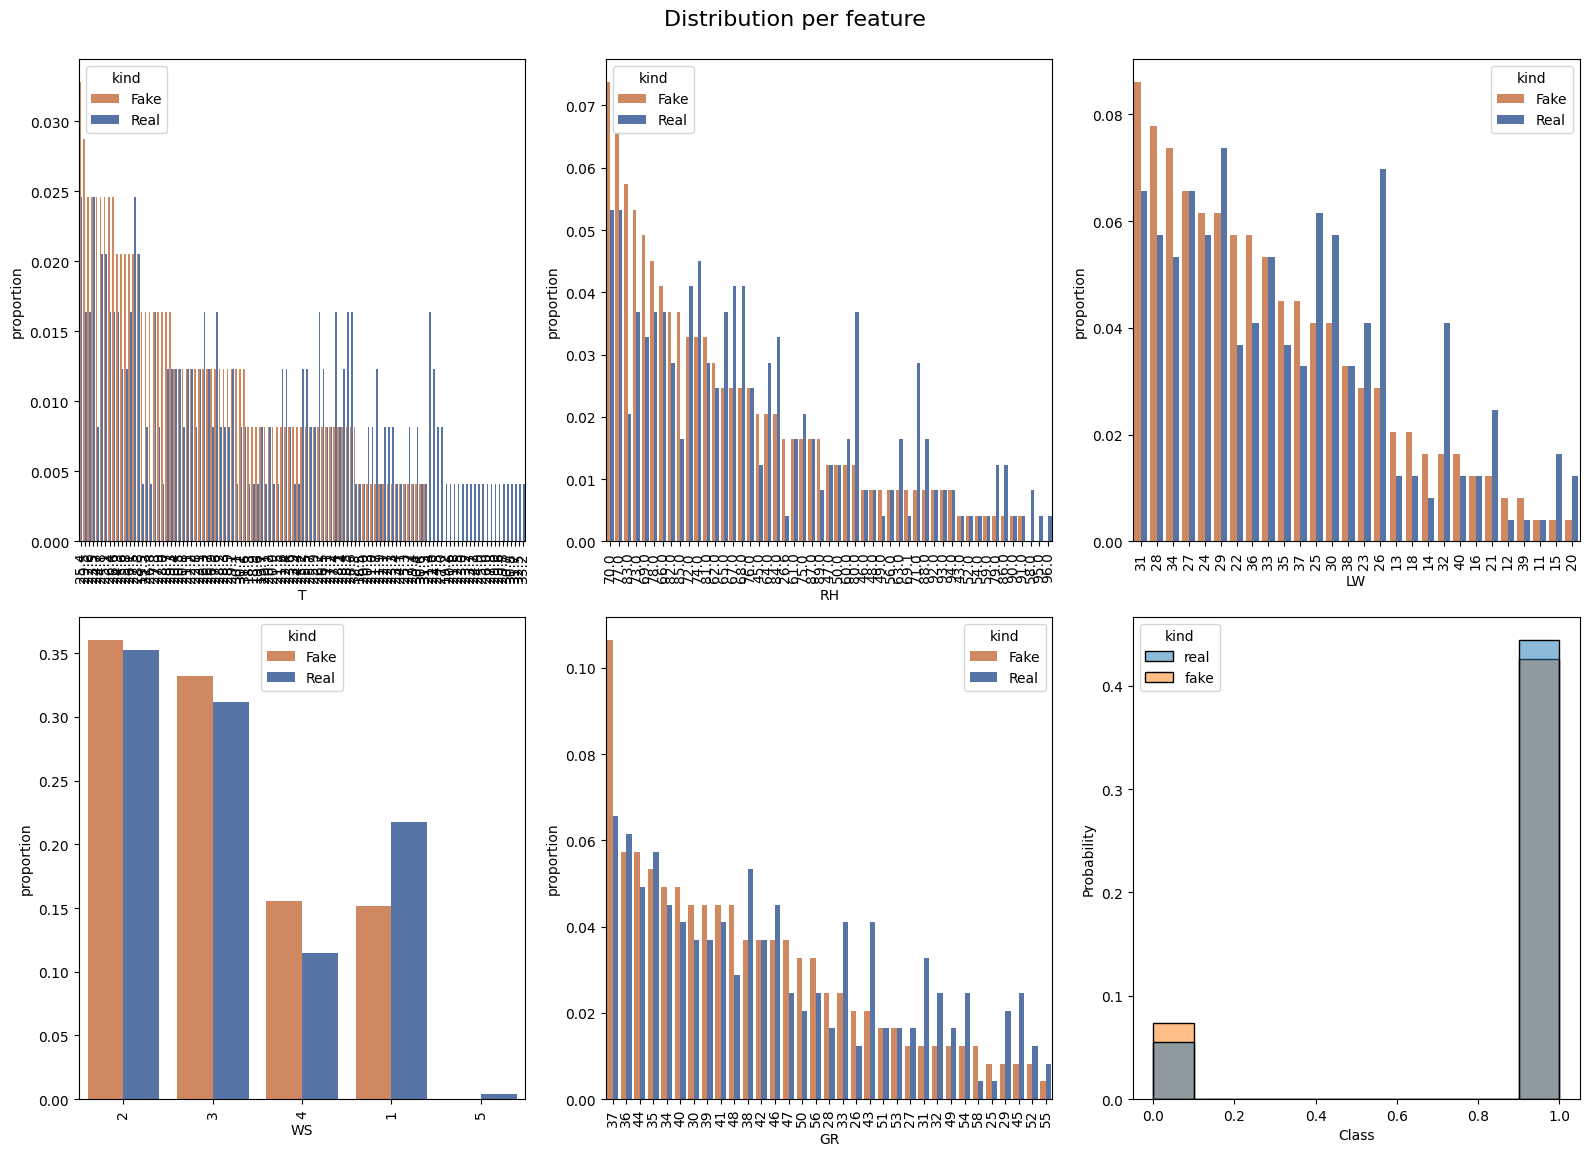

TypeError: Image data of dtype object cannot be converted to float

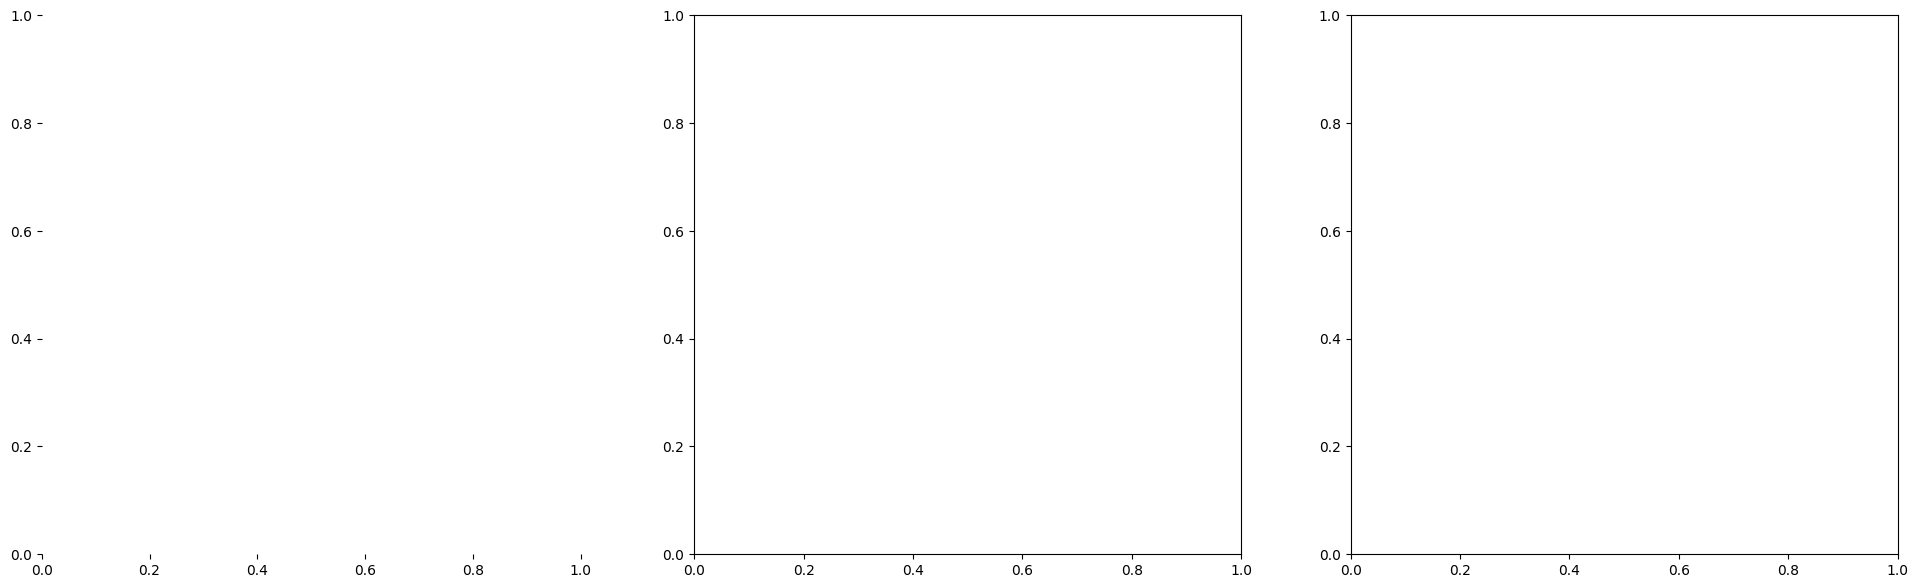

In [ ]:
%pip install table_evaluator
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [ ]:
# from google.colab import drive
# drive.mount('drive')

samples.to_csv('augmented.csv')
# !cp augmented1k.csv "drive/My Drive/"